Welcome!

In [1]:
# %pip install -r requirements.txt
#pip installs a list of libraries
#list can be found in requirements.txt

#important import names
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
#import seaborn as sns

In [3]:
#import statements til I figure out the other way 
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
nltk.download('punkt_tab')
nltk.download('tagsets')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

import random

import pandas as pd

from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn import metrics

import json

import csv

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from tabulate import tabulate

import requests

import re


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\avery\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\avery\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avery\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avery\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\avery\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\avery\AppData\Roaming\nltk_data...
[nltk_data]   Package average

In [3]:
#import sys
#sys.path.append('.')
#from importables import *
#grabs all imports from import.py

#This is not working but it should be >>>:(


In [4]:
df_elife_train = pd.read_parquet('data/Elife/train-00000-of-00001.parquet')
df_elife_test = pd.read_parquet('data/Elife/test-00000-of-00001.parquet')
df_elife_validation = pd.read_parquet('data/Elife/validation-00000-of-00001.parquet')
df_elife_validation.head(5)

,article,summary,section_headings,keywords,year,title
0,Cell-fate reprograming is at the heart of deve...,The DNA in genes encodes the basic information...,"[Abstract, Introduction, Results, Discussion, ...","[developmental, biology]",2016,Increasing Notch signaling antagonizes PRC2-me...
1,"Klebsiella pneumoniae is a respiratory , blood...",Klebsiella pneumoniae is a type of bacteria th...,"[Abstract, Introduction, Results, Discussion, ...","[microbiology, and, infectious, disease, immun...",2020,SKAP2 is required for defense against K. pneum...
2,Plasmodium vivax relapse infections occur foll...,Malaria is one of the world's most deadly infe...,"[Abstract, Introduction, Results, Discussion, ...","[epidemiology, and, global, health]",2014,Modelling the contribution of the hypnozoite r...
3,When 2 Mha of Amazonian forests are disturbed ...,The Amazon rainforest in South America is the ...,"[Abstract, Introduction, Results, Discussion, ...",[ecology],2016,Carbon recovery dynamics following disturbance...
4,Neurosphere formation is commonly used as a su...,Neurons that arise in the adult nervous system...,"[Abstract, Introduction, Results, Discussion, ...","[stem, cells, and, regenerative, medicine]",2014,Prospective identification of functionally dis...


In [5]:
df_plos_train_1 = pd.read_parquet('data/PLOS/train-00000-of-00003.parquet')
df_plos_train_2 = pd.read_parquet('data/PLOS/train-00001-of-00003.parquet')
df_plos_train_3 = pd.read_parquet('data/PLOS/train-00002-of-00003.parquet')
df_plos_test = pd.read_parquet('data/PLOS/test-00000-of-00001.parquet')
df_plos_validation = pd.read_parquet('data/PLOS/validation-00000-of-00001.parquet')
df_plos_train_3.head(5)


,article,summary,section_headings,keywords,year,title
0,Cellular heterogeneity hinders the extraction ...,The mammalian inner ear is a highly complex se...,"[Abstract, Introduction, Results, Discussion, ...","[genetics, of, disease, genome, expression, an...",2011,Cell Type–Specific Transcriptome Analysis Reve...
1,MBT domain proteins are involved in developmen...,Post-translational modifications ( PTM ) of hi...,"[Abstract, Introduction, Results, Discussion, ...","[genetic, mutation, protein, interactions, his...",2011,H3K9me2/3 Binding of the MBT Domain Protein LI...
2,Melioidosis is a problem in the developing tro...,Melioidosis is a problem in the developing tro...,"[Abstract, Introduction, Materials, and, Metho...","[public, and, occupational, health, infectious...",2014,Sulphonylurea Usage in Melioidosis Is Associat...
3,The recent origin and great evolutionary poten...,The AIDS epidemic claims more lives per year t...,"[Abstract, Introduction, Results, Discussion, ...","[public, health, and, epidemiology/infectious,...",2009,Increasing Clinical Virulence in Two Decades o...
4,Invariant representations of stimulus features...,"When we physically interact with an object , o...","[Abstract, Introduction, Results/Discussion, M...","[physiology/sensory, systems, neuroscience/sen...",2010,Shape Invariant Coding of Motion Direction in ...


In [7]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [8]:
def data_cleaner(doc):
    """A function to strip punctuation, strip stopwords, casefold, lemmatize,
    And part of speech tag words for clean data for modeling"""
    custom_stops = ['doi', 'figure', 'elife']
    sw = stopwords.words('english')
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = re.sub(r"\([^()]*\)|\[[^\]]*\]|\{[^}]*\}", "", doc)
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw and word not in custom_stops]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    #print(' '.join(doc))
    return ' '.join(doc)

In [8]:
#listifies contents in articl column
articles_list = df_elife_train.article.tolist()
print(len(articles_list))

4346


In [9]:
#print(articles_list[0])
def freqdist_maker(doc_list):
#tokenize all words in all articles
    doc_tokens = []
    for i in doc_list:
        doc_tokens.append(word_tokenize(i))
        
    #tokenizes raw article data into single list of tokens, not broken into sentences
    doc_tokens_flat = [word for doc in doc_tokens for word in doc]
    
    #collect raw tokens
    all_words_raw = []
    for w in doc_tokens_flat :
        all_words_raw.append(w)
    print('length of all words', len(all_words_raw))

    #gets count of tokens and types
    tokens = all_words_raw
    types = set(tokens)
    print('length of types', len(types))
    print('length of tokens', len(tokens))

    fdist1 = nltk.FreqDist(tokens)

    fdist1.plot(25, title = 'Doc Freqeuncy Distribution', cumulative = True);

In [10]:
#tokenize all words in all articles
article_tokens = []
for i in articles_list:
    article_tokens.append(word_tokenize(i))
print(len(article_tokens[0]))

3093


In [11]:
#tokenizes raw article data into single list of tokens, not broken into sentences
article_tokens_flat = [word for doc in article_tokens for word in doc]

print(article_tokens_flat[0])

In


In [12]:
#collect raw tokens
all_words_raw = []

for w in article_tokens_flat :
    all_words_raw.append(w)
    
print(len(all_words_raw))

45321232


In [13]:
#gets count of tokens and types
tokens = all_words_raw
types = set(tokens)
len(types), len(tokens)

(717066, 45321232)

In [14]:
fdist1 = nltk.FreqDist(tokens)
fdist1
#create frequency distribution, checks all tokens and how often they occur in the vocab
#prints out top 10 most used, these are usally stopwrods as the data has not been cleaned

FreqDist({'.': 2599695, ',': 2231581, 'the': 1630826, ')': 1309277, '(': 1307699, 'of': 1208012, 'and': 1052708, 'in': 821512, 'to': 619133, 'a': 471538, ...})

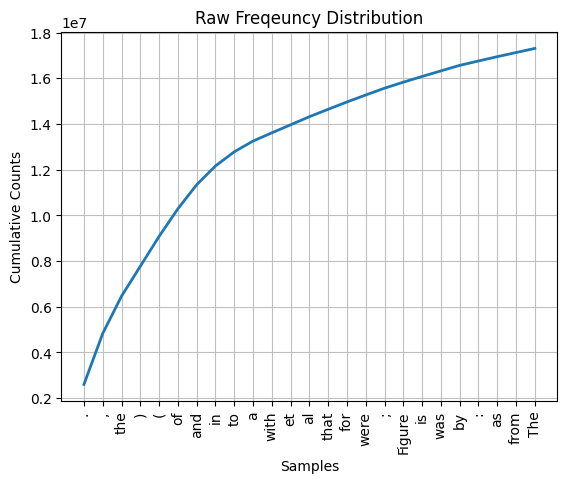

In [15]:
fdist1.plot(25, title = 'Raw Freqeuncy Distribution', cumulative = True);

In [16]:
fdist1.hapaxes()[:10]
#first ten unique words

['geo-coded',
 'June/July',
 'December/January',
 'Medina-Ramón',
 'Bobb',
 'winter-summer',
 'MacDorman',
 'Lerchl',
 'always-connected',
 '15-24']

In [17]:
elife_doc_lengths = []

for doc in articles_list:
    elife_doc_lengths.append(len(doc))

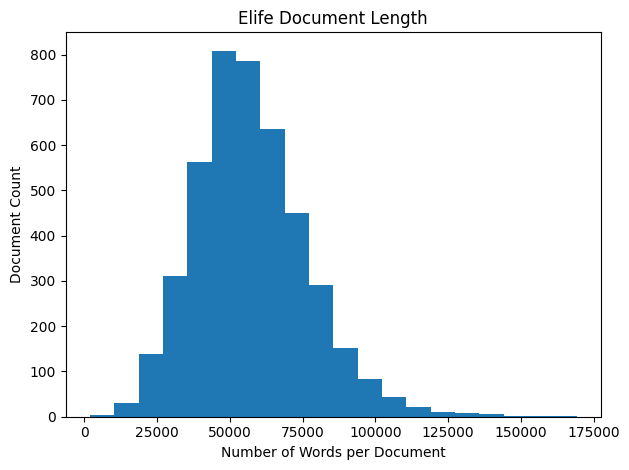

In [18]:
n_bins = 20
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
axs.hist(elife_doc_lengths, bins=n_bins)
axs.set_title("Elife Document Length");
axs.set_xlabel('Number of Words per Document');
axs.set_ylabel("Document Count");

In [19]:
#removing large outliers, go from 436 articles to 4293 articles 

df_elife_train = df_elife_train[df_elife_train['article'].str.len() < 110000 ]
print(df_elife_train.shape)
articles_no_outliers = df_elife_train.article.tolist()
print(len(articles_no_outliers))

(4293, 6)
4293


In [20]:
#run data through data cleaning function

#clean_corpus = []
#for doc in articles_no_outliers:
#    clean_corpus.append(data_cleaner(doc))
#print("done")

In [21]:
#df_elife_train['clean'] = clean_corpus

#df_elife_train.head()

In [13]:
df_elife_train_clean = pd.read_csv('data/clean_elife_train.csv')
df_elife_train_clean.head()

,article,summary,section_headings,keywords,year,title,clean
0,"In temperate climates , winter deaths exceed s...","In the USA , more deaths happen in the winter ...","['Abstract', 'Introduction', 'Results', 'Discu...","['epidemiology', 'and', 'global', 'health']",2018,National and regional seasonal dynamics of all...,temperate climate winter death exceed summer o...
1,Whether complement dysregulation directly cont...,Most people have likely experienced the discom...,"['Abstract', 'Introduction', 'Results', 'Discu...","['microbiology', 'and', 'infectious', 'disease...",2019,Complement and CD4+ T cells drive context-spec...,whether complement dysregulation directly cont...
2,Variation in the presentation of hereditary im...,The immune system protects an individual from ...,"['Abstract', 'Introduction', 'Results', 'Discu...","['microbiology', 'and', 'infectious', 'disease...",2015,Phenotypic complementation of genetic immunode...,variation presentation hereditary immunodefici...
3,Rapid and flexible interpretation of conflicti...,The brain adapts to control our behavior in di...,"['Abstract', 'Introduction', 'Results', 'Discu...",['neuroscience'],2016,Cascade of neural processing orchestrates cogn...,rapid flexible interpretation conflict sensory...
4,Myosin 5a is a dual-headed molecular motor tha...,Cells use motor proteins that to move organell...,"['Abstract', 'Introduction', 'Results', 'Discu...","['structural', 'biology', 'and', 'molecular', ...",2015,Structural dynamics of myosin 5 during process...,myosin dual head molecular motor transport car...


In [23]:
def wordcloud_maker(df, stopwords = None):
    """cretes words clouds from cleaned data"""
    all_clean = " ".join(review for review in df.clean)
    wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(all_clean)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

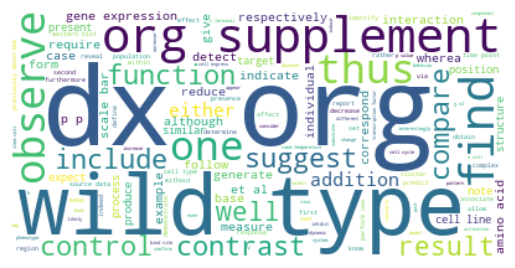

In [25]:
wordcloud_maker(df_elife_train_clean)

length of all words 19547702
length of types 148848
length of tokens 19547702


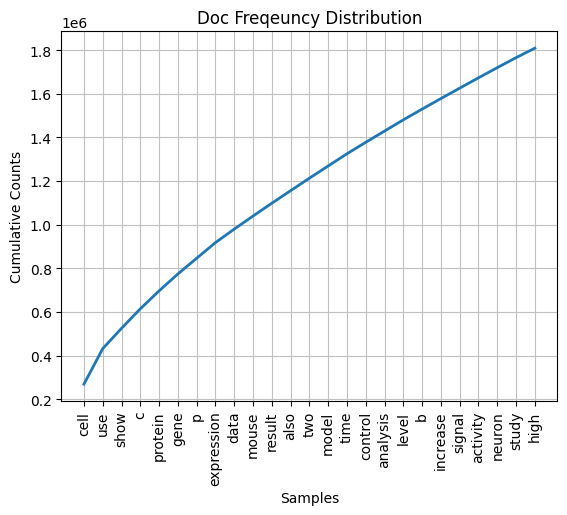

In [26]:
#checking custom stop lists and cleaning worked. Cut down 246k words
clean_doc_list = df_elife_train_clean.clean.tolist()
freqdist_maker(clean_doc_list)

In [ ]:
#creating a csv of cleaned data for later use
#df_elife_train.to_csv('clean_elife_train.csv', index=False)

In [ ]:
# TRY TF-IDF
# Get training articles from df_elife_train
elife_train_articles = df_elife_train.article.tolist()
elife_train_tfidf_model = TfidfVectorizer()
elife_train_tfidf_vector = elife_train_tfidf_model.fit_transform(elife_train_articles)
print(type(elife_train_tfidf_vector), elife_train_tfidf_vector.shape) # Print the shape of the matrix created

In [ ]:
# What are the words in the documents?
words_set = elife_train_tfidf_model.get_feature_names()
print(words_set[:10]) # Print first 10 words
print(words_set[-10:])

In [ ]:
# Create array of the scores
elife_train_tfidf_array = elife_train_tfidf_vector.toarray()
print(elife_train_tfidf_array)

In [ ]:
# Create dataframe of scores for each document
elife_train_tfidf_df = pd.DataFrame(elife_train_tfidf_array, columns = words_set)
print(elife_train_tfidf_df)

In [ ]:
print(elife_train_tfidf_df.at[0, '00']) # Print first cell in dataframe

In [ ]:
# Test regex for letters and numbers only
pattern = r"^[A-Za-z0-9_-]*$"
text = ","
print(bool(re.fullmatch(pattern, text)))

text2 = "0f"
print(bool(re.fullmatch(pattern, text2)))

In [ ]:
# THIS DOESN"T RUN YET BECAUSE TFIDF DOESNT INCLUDE PUNC AND SPLITS HYPHENATED WORDS

elife_train_doc1 = article_tokens[0] # Get first document in token form
doc_index = 0 # The index of the document

sent_ind = 0 # Saves current sentence number
curr_sent = "" # Saves current sentence that is building
sentences = [] # Saves list of all sentences
curr_imp = 0 # Saves current sentence importance
sent_imp_dict = {} # Dict of sent_ind -> importance score

for token in elife_train_doc1: # For every token in the document
    curr_sent += token # Add token to curr sent string
    curr_imp += elife_train_tfidf_df.at[doc_index, token.lower()] # Get importance of current token from the tfidf df

    if token == ".": # If the token is a period
        sentences.append(curr_sent) # Save this sentence to the list of all sentences
        curr_sent = "" # Reset curr
        sent_imp_dict[sent_ind] = curr_imp # Save current importance to dictionary with current sent index as key
        curr_imp = 0 # Reset curr
        sent_ind += 1 #Update index

tot_sent_num = len(sentences) # Get total number of sentences in this doc
print(tot_sent_num)

print(sentences) # Print sentence list

In [14]:
#Rachel's TFIDF implementation
vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range=(1,1))
#calculate the TF-IDF score for unigrams and bigrams in text
elife_train_clean = df_elife_train_clean.clean.tolist()
elife_t_c = vectorizer.fit_transform(elife_train_clean)
#elife_t_c  = pd.DataFrame.sparse.from_spmatrix(elife_t_c)
#elife_t_c.columns = sorted(vectorizer.vocabulary_)
#elife_t_c.set_index(df_elife_train_clean.index, inplace=True)

In [15]:
#sparse data matrix, doc id num on y axis, type on x axis, vector as data
#print(elife_train_clean[0])
print(elife_t_c)
#print(vectorizer.inverse_transform(elife_t_c))

  (0, 135734)	0.009934719979389023
  (0, 7741)	0.004058931398281943
  (0, 9284)	0.005765603938941311
  (0, 11014)	0.013165329130059588
  (0, 41269)	0.0038898205161172713
  (0, 126001)	0.004306336052401963
  (0, 99423)	0.003598692798721439
  (0, 54228)	0.0033764550371620434
  (0, 122729)	0.0036570591391453925
  (0, 104018)	0.011346218728238587
  (0, 42891)	0.004962593001355059
  (0, 125918)	0.0036720599074493462
  (0, 125383)	0.006643553738812058
  (0, 67676)	0.009389621646527957
  (0, 86012)	0.004392661279298773
  (0, 74982)	0.0034312298780542934
  (0, 46947)	0.013394274246291417
  (0, 46914)	0.005097705002257688
  (0, 23890)	0.024803913459302603
  (0, 118123)	0.003227229374621841
  (0, 15474)	0.010710553796196298
  (0, 67255)	0.005537649447314415
  (0, 26579)	0.007663032176110276
  (0, 5026)	0.004335194450872808
  (0, 11443)	0.006240752306596897
  :	:
  (4292, 134150)	0.0016855163065991423
  (4292, 43173)	0.002815754222778879
  (4292, 144956)	0.005123812567808283
  (4292, 43120)	0.002

In [16]:
#checking for data
vocab = list(vectorizer.vocabulary_.items())
print(vocab[:5])

[('temperate', 131941), ('climate', 24423), ('winter', 145502), ('death', 32127), ('exceed', 43929)]


In [17]:
#typ check
print(type(elife_t_c))

<class 'scipy.sparse._csr.csr_matrix'>


In [18]:
#get doc/row 4345
row = elife_t_c.iloc[2]

AttributeError: iloc not found

In [19]:
#max value = highest vector = "best feature"
max_value = row.max()

NameError: name 'row' is not defined

In [33]:
print(max_value)

0.6263360141269374


In [34]:
#"most important word?"
column_of_max = row.idxmax()
print(column_of_max)

hoil


In [ ]:
#dict of dict where key is doc index, val is dict, inner dict key is sent index, val is vector sum
doc_word_vector_dict = elife_t_c.to_dict(orient='index')

In [ ]:
doc_word_vector_dict['3']

In [ ]:
def make_doc_sentence_list(doc):
    #regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    #doc = re.sub(r"\([^()]*\)|\[[^\]]*\]|\{[^}]*\}", "", doc)
    #doc = regex_token.tokenize(doc)
    doc_list = re.findall(r"\b\w+\b|[.,!?;]", doc)
    curr_sent = []
    sentences = []
    lemma_sentences = []
    curr_lemma_sent = []
    for token in doc_list:

        curr_sent.append(token)
        if token == ".":
            sentences.append(curr_sent)
            curr_lemma_sent = [word.lower() for word in curr_sent]
            curr_lemma_sent = pos_tag(curr_lemma_sent)
            curr_lemma_sent = [(word[0], get_wordnet_pos(word[1])) for word in curr_lemma_sent]
            lemmatizer = WordNetLemmatizer() 
            curr_lemma_sent = [lemmatizer.lemmatize(word[0], word[1]) for word in curr_lemma_sent]
            lemma_sentences.append(curr_lemma_sent)
            curr_sent = []
            curr_lemma_sent = []


    return sentences, lemma_sentences


In [ ]:
doc = "This is a test sentence. And, this is a second test sentence."
sentences, lemma_sentences = make_doc_sentence_list(doc)
print(sentences)
print(lemma_sentences)



In [26]:
#small scale version of sentnce tokenization, must be expanded with for looop and data structure
articles_list_2 = df_elife_train.article.tolist()
art = articles_list_2[0] #grab first article
art_sent = nltk.sent_tokenize(art) #sentnce split
clean_sents = []
for doc in art_sent:
    clean_sents.append(data_cleaner(doc)) #clean sentences
    
def sentence_value_creator(doc, vect_obj):
    """ 
    A function to take in a single article at a time, split the article by sentences, clean those sentences, split each sentence by words,
    match each word with its vector, sum the vectors and return a list of sentence indexes and vector sums
    """
    sent_index_val_dict = [] #keeps sent index and vector val as tuple
    doc_sents = nltk.sent_tokenize(doc) #sentence split
    clean_sents = []
    for i, sent in enumerate(doc_sents):
        clean_sent = data_cleaner(sent) #clean sentences
        c = 0.0 #sums vectors
        sent_split = clean_sent.split() #word split
        for word in sent_split:
            #print(word)
            if word in vectorizer.vocabulary_:
                vec_val = vect_obj[i, vectorizer.vocabulary_[word]]
                #if word in vector_dict[i]:
                c += vec_val
        sent_index_val_dict.append((i,float(c)))
    return sent_index_val_dict
                

In [27]:
sent_catcher = sentence_value_creator(art, elife_t_c) 
sorted_sent = sorted(sent_catcher, key=lambda x: x[1]) #sort based on second tuple object
print(sorted_sent[len(sorted_sent) - 10 : ]) #print highets ten vector scores

[(51, 0.1290412318328856), (66, 0.13551360624737585), (108, 0.13756865392530376), (97, 0.14589060519834474), (10, 0.1509498735656042), (101, 0.21874741926232708), (18, 0.24798458947266772), (119, 0.26131849480717834), (19, 0.3567385793606587), (0, 0.9864876272109825)]


In [82]:
print(clean_sents[0], clean_sents[10],
clean_sents[18],
clean_sents[19],
clean_sents[86],
clean_sents[101],
clean_sents[105],
clean_sents[114],
clean_sents[119],
clean_sents[121])

temperate climate winter death exceed summer one large country like usa possesses distinct climate region seasonality mortality may vary geographically due geographical variation mortality localize weather pattern regional difference adaptation measure heat air condition healthcare davis et al thorough understand long term dynamic seasonality mortality geographical demographic pattern need identify risk group plan responses present time well change climate condition although mortality seasonality well establish limited information seasonality include time minimum maximum mortality varies local climate feature change time especially relation age group sex medical cause death rau rau et al analysis seasonality cause death map icd icd code four main disease category number subcategories present supplementary note use gridded four time daily estimate resolution km generate monthly population weight temperature climate region throughout analysis period equivalent use move window death rate 

In [28]:
# What if we had the method take the list of sentences as parameter instead of the whole doc?

def sentence_value_creator_2(doc_sents: list, vect_obj) -> list:
    """ 
    A function to take in a single article at a time, split the article by sentences, clean those sentences, split each sentence by words,
    match each word with its vector, sum the vectors and return a list of sentence indexes and vector sums
    """
    sent_index_val_dict = [] #keeps sent index and vector val as tuple
    clean_sents = []
    for i, sent in enumerate(doc_sents):
        clean_sent = data_cleaner(sent) #clean sentences
        c = 0.0 #sums vectors
        sent_split = clean_sent.split() #word split
        for word in sent_split:
            #print(word)
            if word in vectorizer.vocabulary_:
                vec_val = vect_obj[i, vectorizer.vocabulary_[word]]
                #if word in vector_dict[i]:
                c += vec_val
        sent_index_val_dict.append((i,float(c)))
    return sent_index_val_dict

In [33]:
# Create the tfidf summary of the first doc
doc_list = df_elife_train.article.tolist()
doc_1 = articles_list_2[0] #grab first article
doc_1_sents = nltk.sent_tokenize(doc_1) #sentnce split

sent_values_1 = sentence_value_creator_2(doc_1_sents, elife_t_c) 
sorted_scores_1 = sorted(sent_values_1, key=lambda x: x[1]) #sort based on second tuple object
print(sorted_scores_1[len(sorted_scores_1) - 10 : ]) #print highets ten vector scores

top_num = 10 # Number of sentences to save

sorted_scores_1 = sorted_scores_1[-top_num:] # Crop to just the top top_num sents
print(sorted_scores_1)

sorted_sents_1 = sorted(sorted_scores_1, key = lambda x: x[0]) # Sort the top 10 by index
print(sorted_sents_1)

doc_1_summary = "" # Save summary of doc 1 as string
for (index, score) in sorted_sents_1:
    sent = doc_1_sents[index]
    doc_1_summary = doc_1_summary + sent + " " # Add original sent to summary

print(doc_1_summary)


[(51, 0.1290412318328856), (66, 0.13551360624737585), (108, 0.13756865392530376), (97, 0.14589060519834474), (10, 0.1509498735656042), (101, 0.21874741926232708), (18, 0.24798458947266772), (119, 0.26131849480717834), (19, 0.3567385793606587), (0, 0.9864876272109825)]
[(51, 0.1290412318328856), (66, 0.13551360624737585), (108, 0.13756865392530376), (97, 0.14589060519834474), (10, 0.1509498735656042), (101, 0.21874741926232708), (18, 0.24798458947266772), (119, 0.26131849480717834), (19, 0.3567385793606587), (0, 0.9864876272109825)]
[(0, 0.9864876272109825), (10, 0.1509498735656042), (18, 0.24798458947266772), (19, 0.3567385793606587), (51, 0.1290412318328856), (66, 0.13551360624737585), (97, 0.14589060519834474), (101, 0.21874741926232708), (108, 0.13756865392530376), (119, 0.26131849480717834)]
In temperate climates , winter deaths exceed summer ones . In a large country like the USA , which possesses distinct climate regions , the seasonality of mortality may vary geographically , du

In [ ]:
# Remove outliers and citations
# Calculate average length of abstractive summaries to set as top_num
# Check that clean and unclean sentences are same length
# Look at 10 summaries 
# Run on the mac and save as new column in dataframe
# Add more notes to the code; add markdown cells
# Make new file as "pretty version"

In [ ]:
# Create simple tfidf summary for every doc (currently only doing first 2 docs)
top_num = 10 # Number of sentences to save
doc_summaries = [] # List to store the summaries
doc_list = df_elife_train.article.tolist() # List of all the docs 

for doc in doc_list[:2]: # For every doc
    doc_sents = nltk.sent_tokenize(doc) #sentence split
    sent_scores = sentence_value_creator_2(doc_sents, elife_t_c) # Get the scores for all the sentences
    sorted_scores = sorted(sent_scores, key=lambda x: x[1]) #sort based on second tuple object; sort by score
    sorted_scores = sorted_scores[-top_num:] # Crop to just the top top_num sents
    sorted_sents = sorted(sorted_scores, key = lambda x: x[0]) # Sort the top sents by index
    doc_summary = "" # Save summary of doc 1 as string
    for (index, score) in sorted_sents:
        sent = doc_sents[index]
        doc_summary = doc_summary + sent + " " # Add original sent to summary 
    doc_summaries.append(doc_summary) # Add the summary to the list of all summaries

for summary in doc_summaries:
    print(summary)

# Save the summaries as a new column on dataframe
df_elife_train_clean['tfidf_summary'] = doc_summaries
    

In temperate climates , winter deaths exceed summer ones . In a large country like the USA , which possesses distinct climate regions , the seasonality of mortality may vary geographically , due to geographical variations in mortality , localized weather patterns , and regional differences in adaptation measures such as heating , air conditioning and healthcare ( Davis et al . A thorough understanding of the long-term dynamics of seasonality of mortality , and its geographical and demographic patterns , is needed to identify at-risk groups , plan responses at the present time as well as under changing climate conditions . Although mortality seasonality is well-established , there is limited information on how seasonality , including the timing of minimum and maximum mortality , varies by local climate and how these features have changed over time , especially in relation to age group , sex and medical cause of death ( Rau , 2004; Rau et al . The weakening of seasonality in boys under f